In [ ]:
# !pip install autogluon

In [56]:
import pandas as pd

train_df = pd.read_csv("IOT_Train.csv")

## EDA

In [57]:
train_df.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2


In [58]:
train_df.describe()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
count,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,6841.000000,6841.000000,13635.000000,13635.000000,13635.000000,13634.000000
mean,452665.897543,4526.625376,45.179391,15.498114,101.728711,80.428258,33.196553,7.657652,6.449203,0.135827,161.854785,4.533869,29.083827
std,213925.103701,2139.240731,21.448269,2.345306,2.180078,12.442925,34.509041,8.449023,8.415738,1.112371,100.338928,181.668659,4.344476
min,102601.000000,1026.000000,10.000000,10.579849,98.573417,40.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000
25%,300903.000000,3009.000000,30.000000,14.533026,100.569662,71.000000,0.000000,3.000000,2.000000,0.000000,45.000000,0.000000,25.800000
50%,380704.000000,3807.000000,38.000000,16.494229,102.052114,82.400000,16.000000,6.000000,4.000000,0.000000,180.000000,1.400000,28.100000
75%,550404.000000,5504.000000,55.000000,18.142499,104.350891,90.600000,68.000000,10.000000,9.000000,0.000000,225.000000,3.400000,31.700000
max,860206.000000,8602.000000,86.000000,18.241106,104.495172,100.000000,96.000000,368.000000,368.000000,34.100000,337.500000,15094.300000,51.100000


In [59]:
len(train_df)

13635

In [60]:
train_df.isnull().sum()

mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             6794
pm2.5            6794
rainfall            0
wind_direct         0
wind_speed          0
temp                1
dtype: int64

In [61]:
test_df = pd.read_csv("IOT_Test.csv")

In [62]:
test_df.isnull().sum()

id                  0
mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             1726
pm2.5            1726
rainfall            0
wind_direct         0
wind_speed          0
dtype: int64

<Axes: >

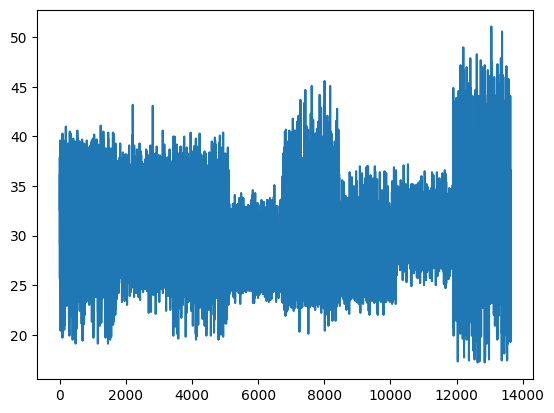

In [63]:
train_df['temp'].plot()

## Preprocessing and fill the nan Numbers

In [64]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_cols = list(train_df.select_dtypes(include=numerics).columns)
cat_cols = list(train_df.select_dtypes(include="object").columns)
cat_cols.remove("time")

In [65]:
test_cat_cols = list(test_df.select_dtypes(include="object").columns)
test_num_cols = list(test_df.select_dtypes(include=numerics).columns)
test_cat_cols.remove("time")

In [66]:
# Categorical - LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

train_df[cat_cols] = train_df[cat_cols].apply(LabelEncoder().fit_transform)
test_df[cat_cols] = test_df[test_cat_cols].apply(LabelEncoder().fit_transform)

test_df.drop(columns="id", inplace=True)

In [67]:
train_df["time"] = pd.to_datetime(train_df["time"])
test_df["time"] = pd.to_datetime(test_df["time"])

In [68]:
# Year, Month, Day: df['timestamp_col'].dt.year, df['timestamp_col'].dt.month, df['timestamp_col'].dt.day
# Hour, Minute, Second: df['timestamp_col'].dt.hour, df['timestamp_col'].dt.minute, df['timestamp_col'].dt.second
# Day of Week, Day of Year, Week of Year: df['timestamp_col'].dt.dayofweek, df['timestamp_col'].dt.dayofyear, df['timestamp_col'].dt.isocalendar().week

# Representing cyclical patterns like time of day or day of week using sine and cosine transformations can help models understand periodicity without implying a linear relationship.
# For example, for hour: df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24) and df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24).

In [69]:
import numpy as np

# Timestamp - Feature Engineering
def create_feature(df):
  df['year'] = df['time'].dt.year
  df['month'] = df['time'].dt.month
  df['day'] = df['time'].dt.day
  df["hour"] = df["time"].dt.hour
  df['day_of_month'] = df['time'].dt.day
  df['day_of_week'] = df['time'].dt.dayofweek # Monday=0, Sunday=6
  df['is_weekend'] = df['time'].dt.dayofweek.isin([5, 6]).astype(int) # 1 if weekend, 0 otherwise
  df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
  df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
  df.drop(columns=["time"], inplace=True)
  return df

In [70]:
train_df = create_feature(train_df)
test_df = create_feature(test_df)

In [71]:
# Fill the NaN numbers

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

columns_to_impute = ["pm10", "pm2.5"]

# Impute mean values
for col in columns_to_impute:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())

In [72]:
train_df = train_df.dropna()

In [73]:
train_df.columns

Index(['mac', 'station_name', 'tambon_code', 'tambon_namt', 'amphur_code',
       'amphur_namt', 'province_code', 'province_namt', 'latitude',
       'longitude', 'humid', 'light', 'pm10', 'pm2.5', 'rainfall',
       'wind_direct', 'wind_speed', 'temp', 'year', 'month', 'day', 'hour',
       'day_of_month', 'day_of_week', 'is_weekend', 'hour_sin', 'hour_cos'],
      dtype='object')

In [74]:
train_df[["pm10", "pm2.5", "rainfall", "wind_direct", "wind_speed"]].describe()

,pm10,pm2.5,rainfall,wind_direct,wind_speed
count,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000
mean,7.657652,6.449203,0.135837,161.853455,4.533739
std,5.984651,5.961074,1.112411,100.342488,181.675321
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,45.000000,0.000000
50%,7.657652,6.449203,0.000000,180.000000,1.400000
75%,7.657652,6.449203,0.000000,225.000000,3.400000
max,368.000000,368.000000,34.100000,337.500000,15094.300000


In [75]:
remove_cols = ["tambon_code", "amphur_code", "year"]
selected_features = ["station_name", "tambon_namt", "light", "humid", "pm10", "pm2.5", "rainfall", "wind_direct", "wind_speed"]

In [76]:
train_df.describe()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,...,temp,year,month,day,hour,day_of_month,day_of_week,is_weekend,hour_sin,hour_cos
count,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,...,13634.000000,13634.0,13634.00000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,13634.000000,1.363400e+04
mean,3.513716,3.519803,452677.028752,3.521490,4526.736688,3.513349,45.180505,3.520757,15.498142,101.728687,...,29.083827,2022.0,5.99956,15.996699,11.493619,15.996699,3.009755,0.287076,-0.001609,-2.328897e-04
std,2.296128,2.301476,213929.000587,2.295301,2139.279699,2.289315,21.448662,2.288844,2.345390,2.180156,...,4.344476,0.0,0.81853,8.733194,6.922769,8.733194,1.999261,0.452414,0.706300,7.079625e-01
min,0.000000,0.000000,102601.000000,0.000000,1026.000000,0.000000,10.000000,0.000000,10.579849,98.573417,...,17.200000,2022.0,5.00000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,1.000000,1.000000,300903.000000,1.000000,3009.000000,1.000000,30.000000,2.000000,14.533026,100.569662,...,25.800000,2022.0,5.00000,9.000000,5.000000,9.000000,1.000000,0.000000,-0.707107,-7.071068e-01
50%,4.000000,4.000000,380704.000000,4.000000,3807.000000,4.000000,38.000000,4.000000,16.494229,102.052114,...,28.100000,2022.0,6.00000,16.000000,12.000000,16.000000,3.000000,0.000000,0.000000,-1.836970e-16
75%,6.000000,6.000000,550404.000000,6.000000,5504.000000,6.000000,55.000000,6.000000,18.142499,104.350891,...,31.700000,2022.0,7.00000,24.000000,17.000000,24.000000,5.000000,1.000000,0.707107,7.071068e-01
max,7.000000,7.000000,860206.000000,7.000000,8602.000000,7.000000,86.000000,7.000000,18.241106,104.495172,...,51.100000,2022.0,7.00000,31.000000,23.000000,31.000000,6.000000,1.000000,1.000000,1.000000e+00


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df = train_df.drop(columns=remove_cols)
test_df = test_df.drop(columns=remove_cols)
train_df[selected_features] = scaler.fit_transform(train_df[selected_features])
test_df[selected_features] = scaler.fit_transform(test_df[selected_features])

In [78]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# Specify the column to predict (target variable)
label_column = "temp"

# Initialize the AutoGluon TabularPredictor
predictor = TabularPredictor(label=label_column, eval_metric="mae").fit(train_df, time_limit=900, presets="best", ag_args_fit={'num_gpus': 4})

No path specified. Models will be saved in: "AutogluonModels/ag-20250705_152415"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Jan 13 18:15:17 UTC 2025 (7f98b6b)
CPU Count:          64
Memory Avail:       489.22 GB / 502.44 GB (97.4%)
Disk Space Avail:   943.91 GB / 1024.00 GB (92.2%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_st

In [79]:
predictions = predictor.predict(test_df)

In [80]:
len(predictions)

3413

In [81]:
sub_df = pd.read_csv("IOT_Submit.csv")

In [82]:
len(sub_df)

3413

In [83]:
sub_df['temp'] = predictions

0	1	25.6
1	2	30.1
2	3	24.7

In [84]:
sub_df['temp'] = sub_df['temp'].round(2)

In [85]:
sub_df

,id,temp
0,1,25.709999
1,2,28.830000
2,3,24.780001
3,4,29.370001
4,5,34.470001
...,...,...
3408,3409,25.469999
3409,3410,33.360001
3410,3411,27.139999
3411,3412,25.280001


In [87]:
sub_df.to_csv("autogluon_best_standardscaler_4gpus.csv", index=False)

In [86]:
sub_df['temp'].sum()

np.float32(99522.1)

* Round up - 99307.34